In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
cardata = pd.read_csv(r'cleaned_data.csv')
cardata.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5874 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 596.7+ KB


# Numerical Data

In [6]:
numercialdata = cardata[["Year","Kilometers_Driven","Mileage","Engine","Power","Seats","Price"]]

In [7]:
numercialdata.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5874.000000,5.874000e+03,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000
mean,2013.476507,5.832412e+04,18.273829,1625.701226,113.272203,5.283623,9.601551
std,3.166025,9.215466e+04,4.371965,601.544134,53.873317,0.804961,11.248283
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.343125e+04,15.260000,1198.000000,75.000000,5.000000,3.512500
50%,2014.000000,5.262150e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240825e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


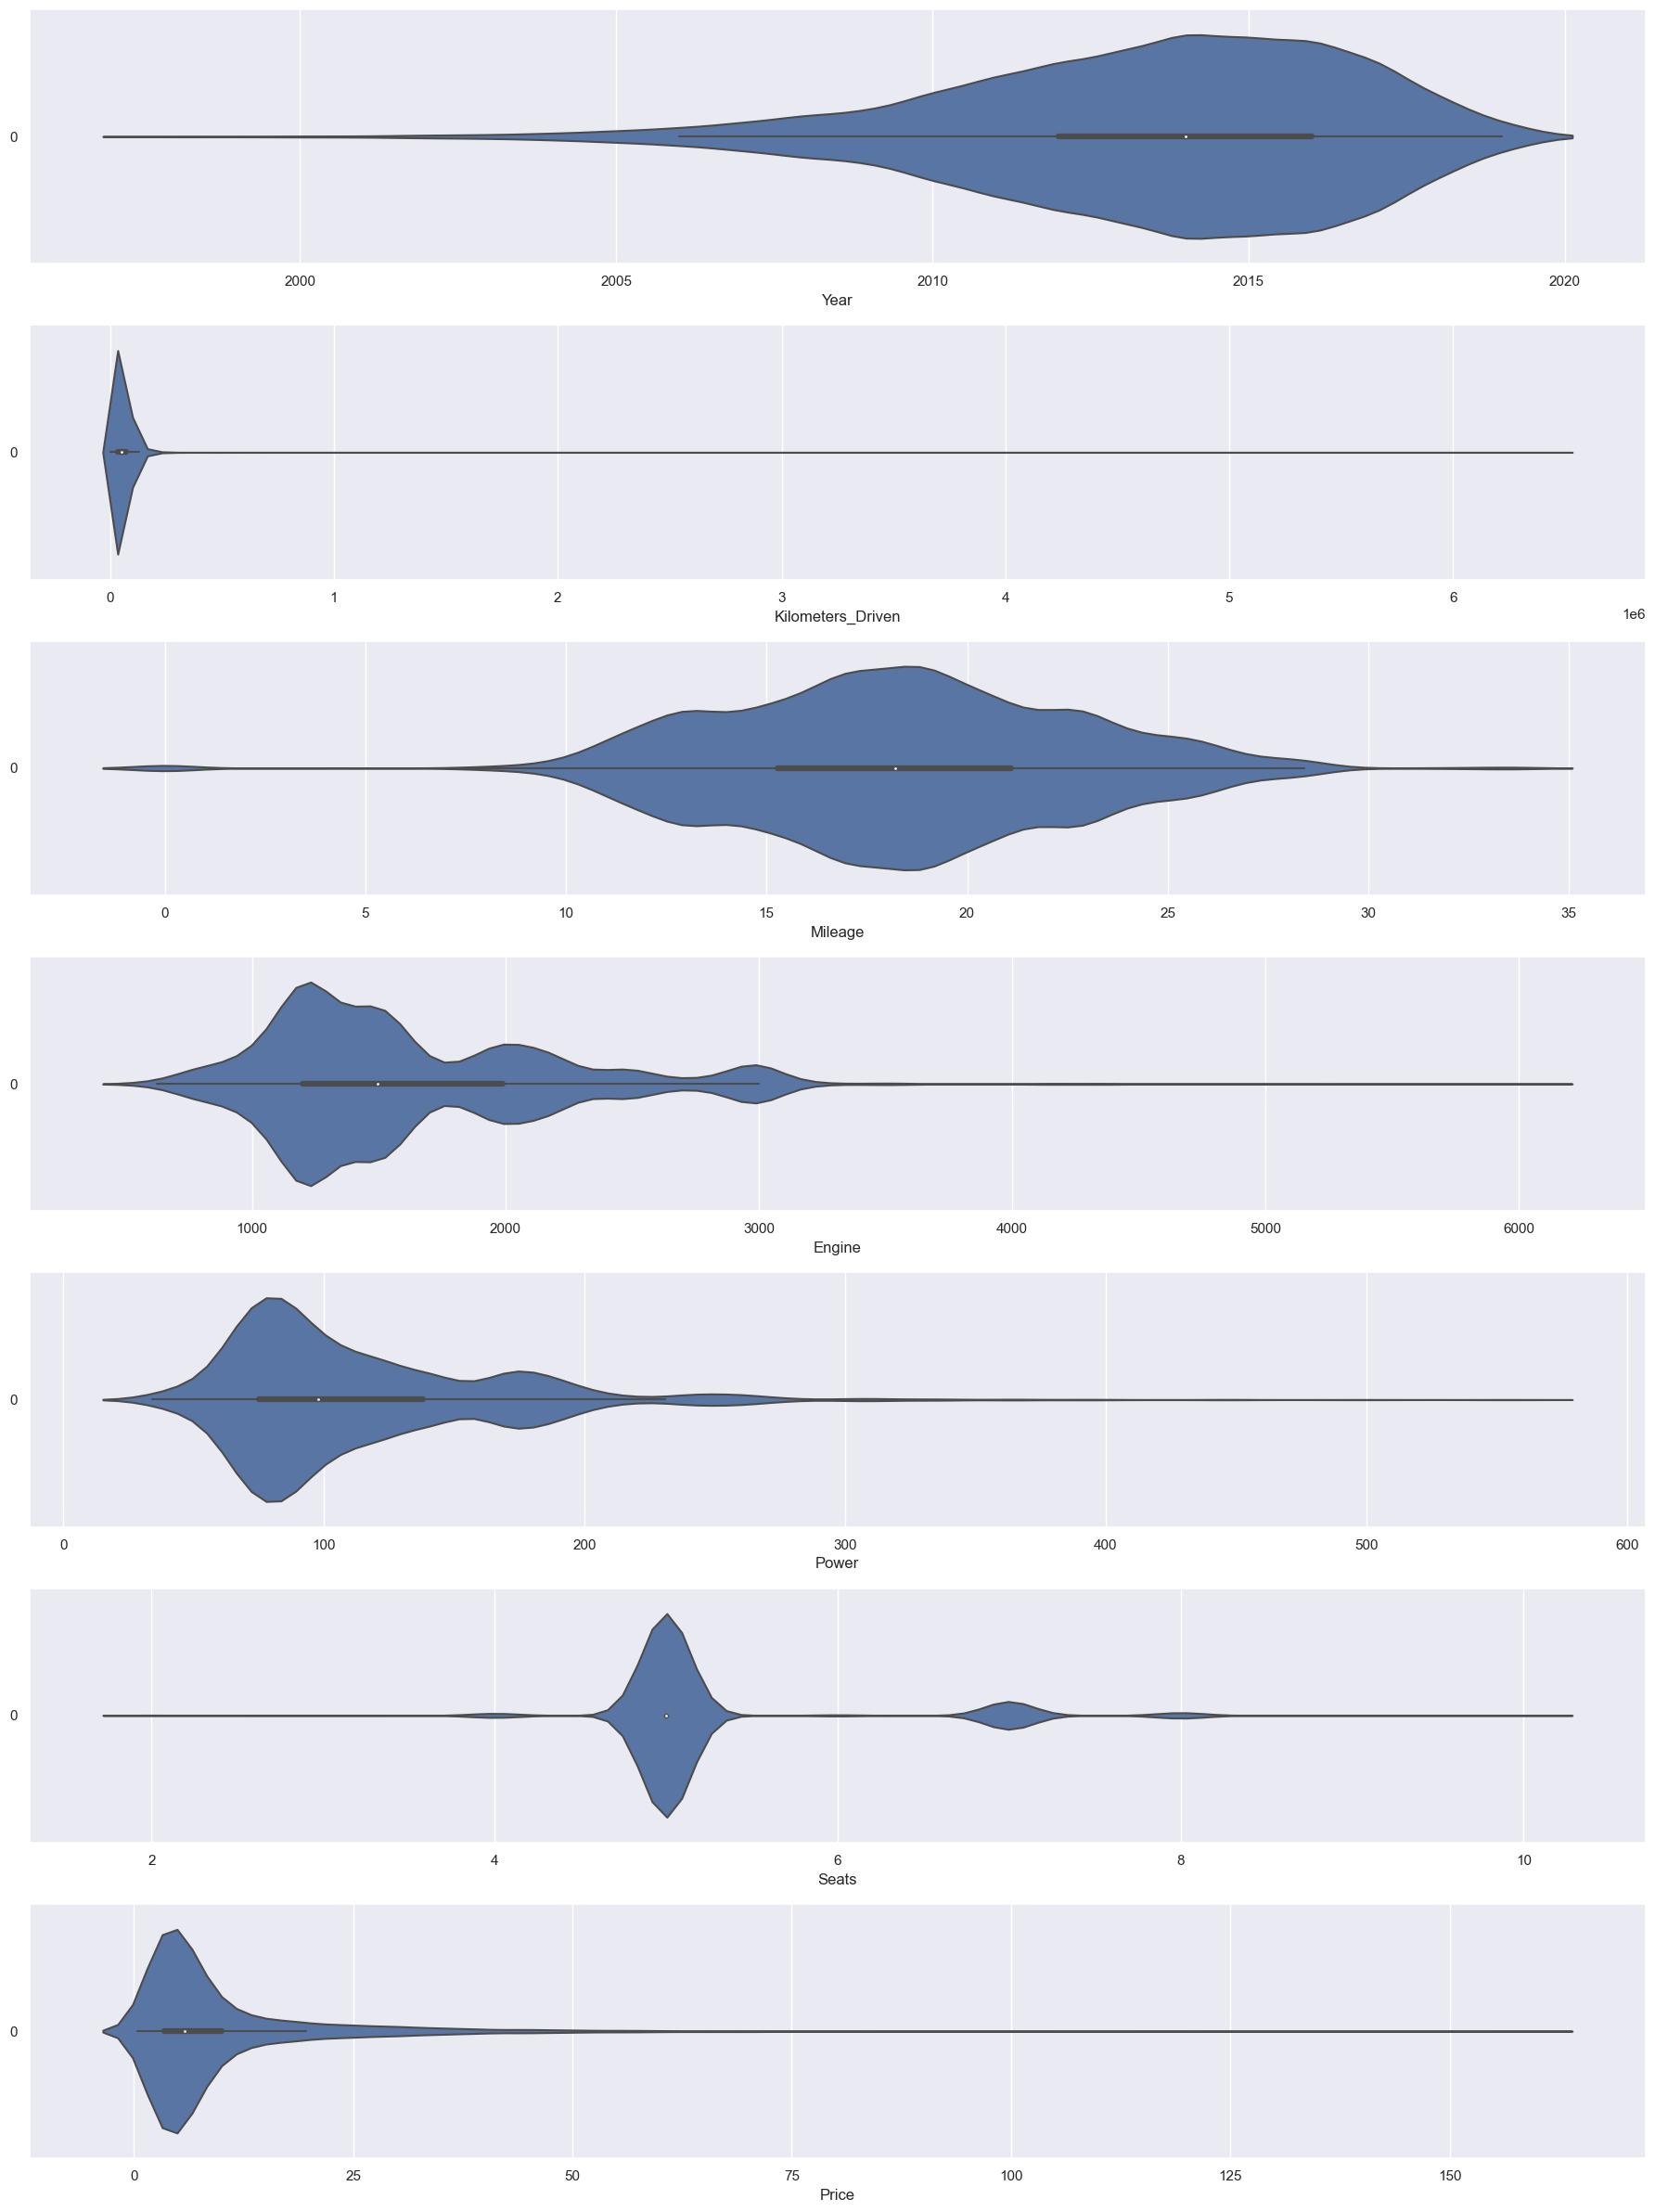

In [35]:
f, axes = plt.subplots(7, figsize=(18, 24))

# Draw violin plots
for count, var in enumerate(numercialdata):
    sb.violinplot(data=numercialdata[var], orient="h", ax=axes[count])
    axes[count].set_xlabel(var)
    
# Adjust layout
plt.tight_layout()
plt.show()

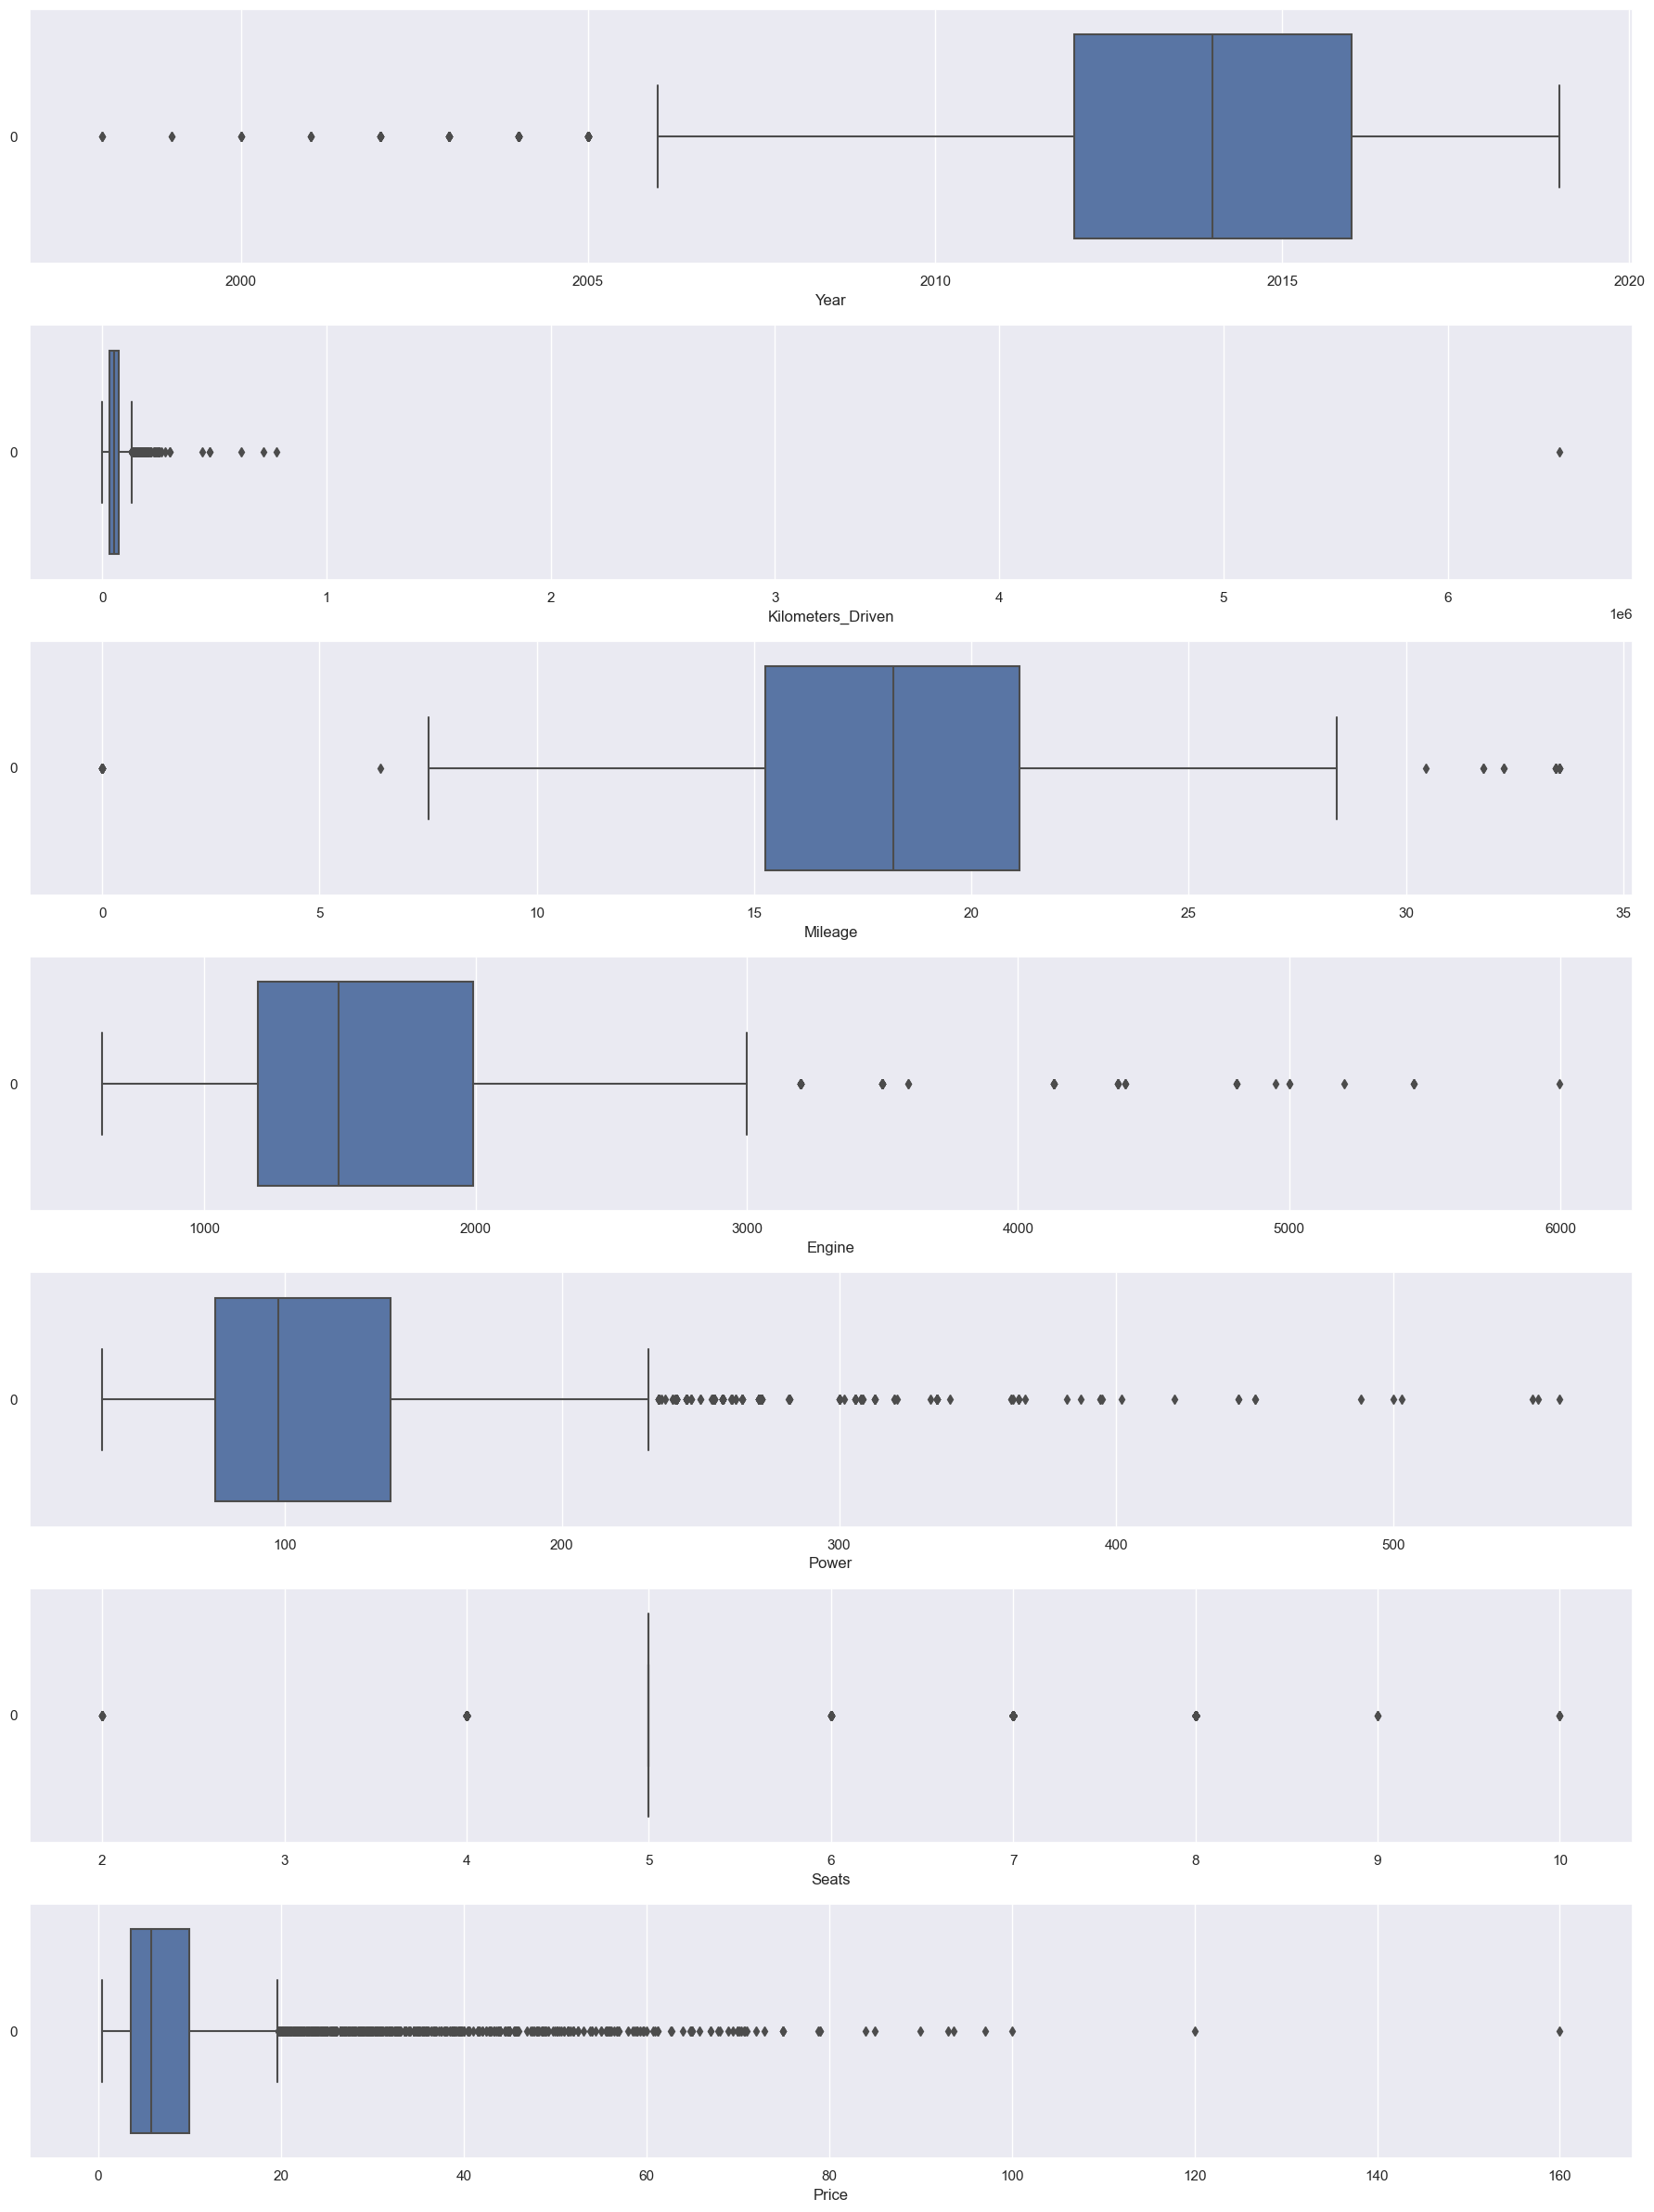

In [36]:
# Draw box plots
f, axes = plt.subplots(7, figsize=(18, 24))

for count, var in enumerate(numercialdata):
    sb.boxplot(data=numercialdata[var], orient="h", ax=axes[count])
    axes[count].set_xlabel(var)
    
# Adjust layout
plt.tight_layout()
plt.show()

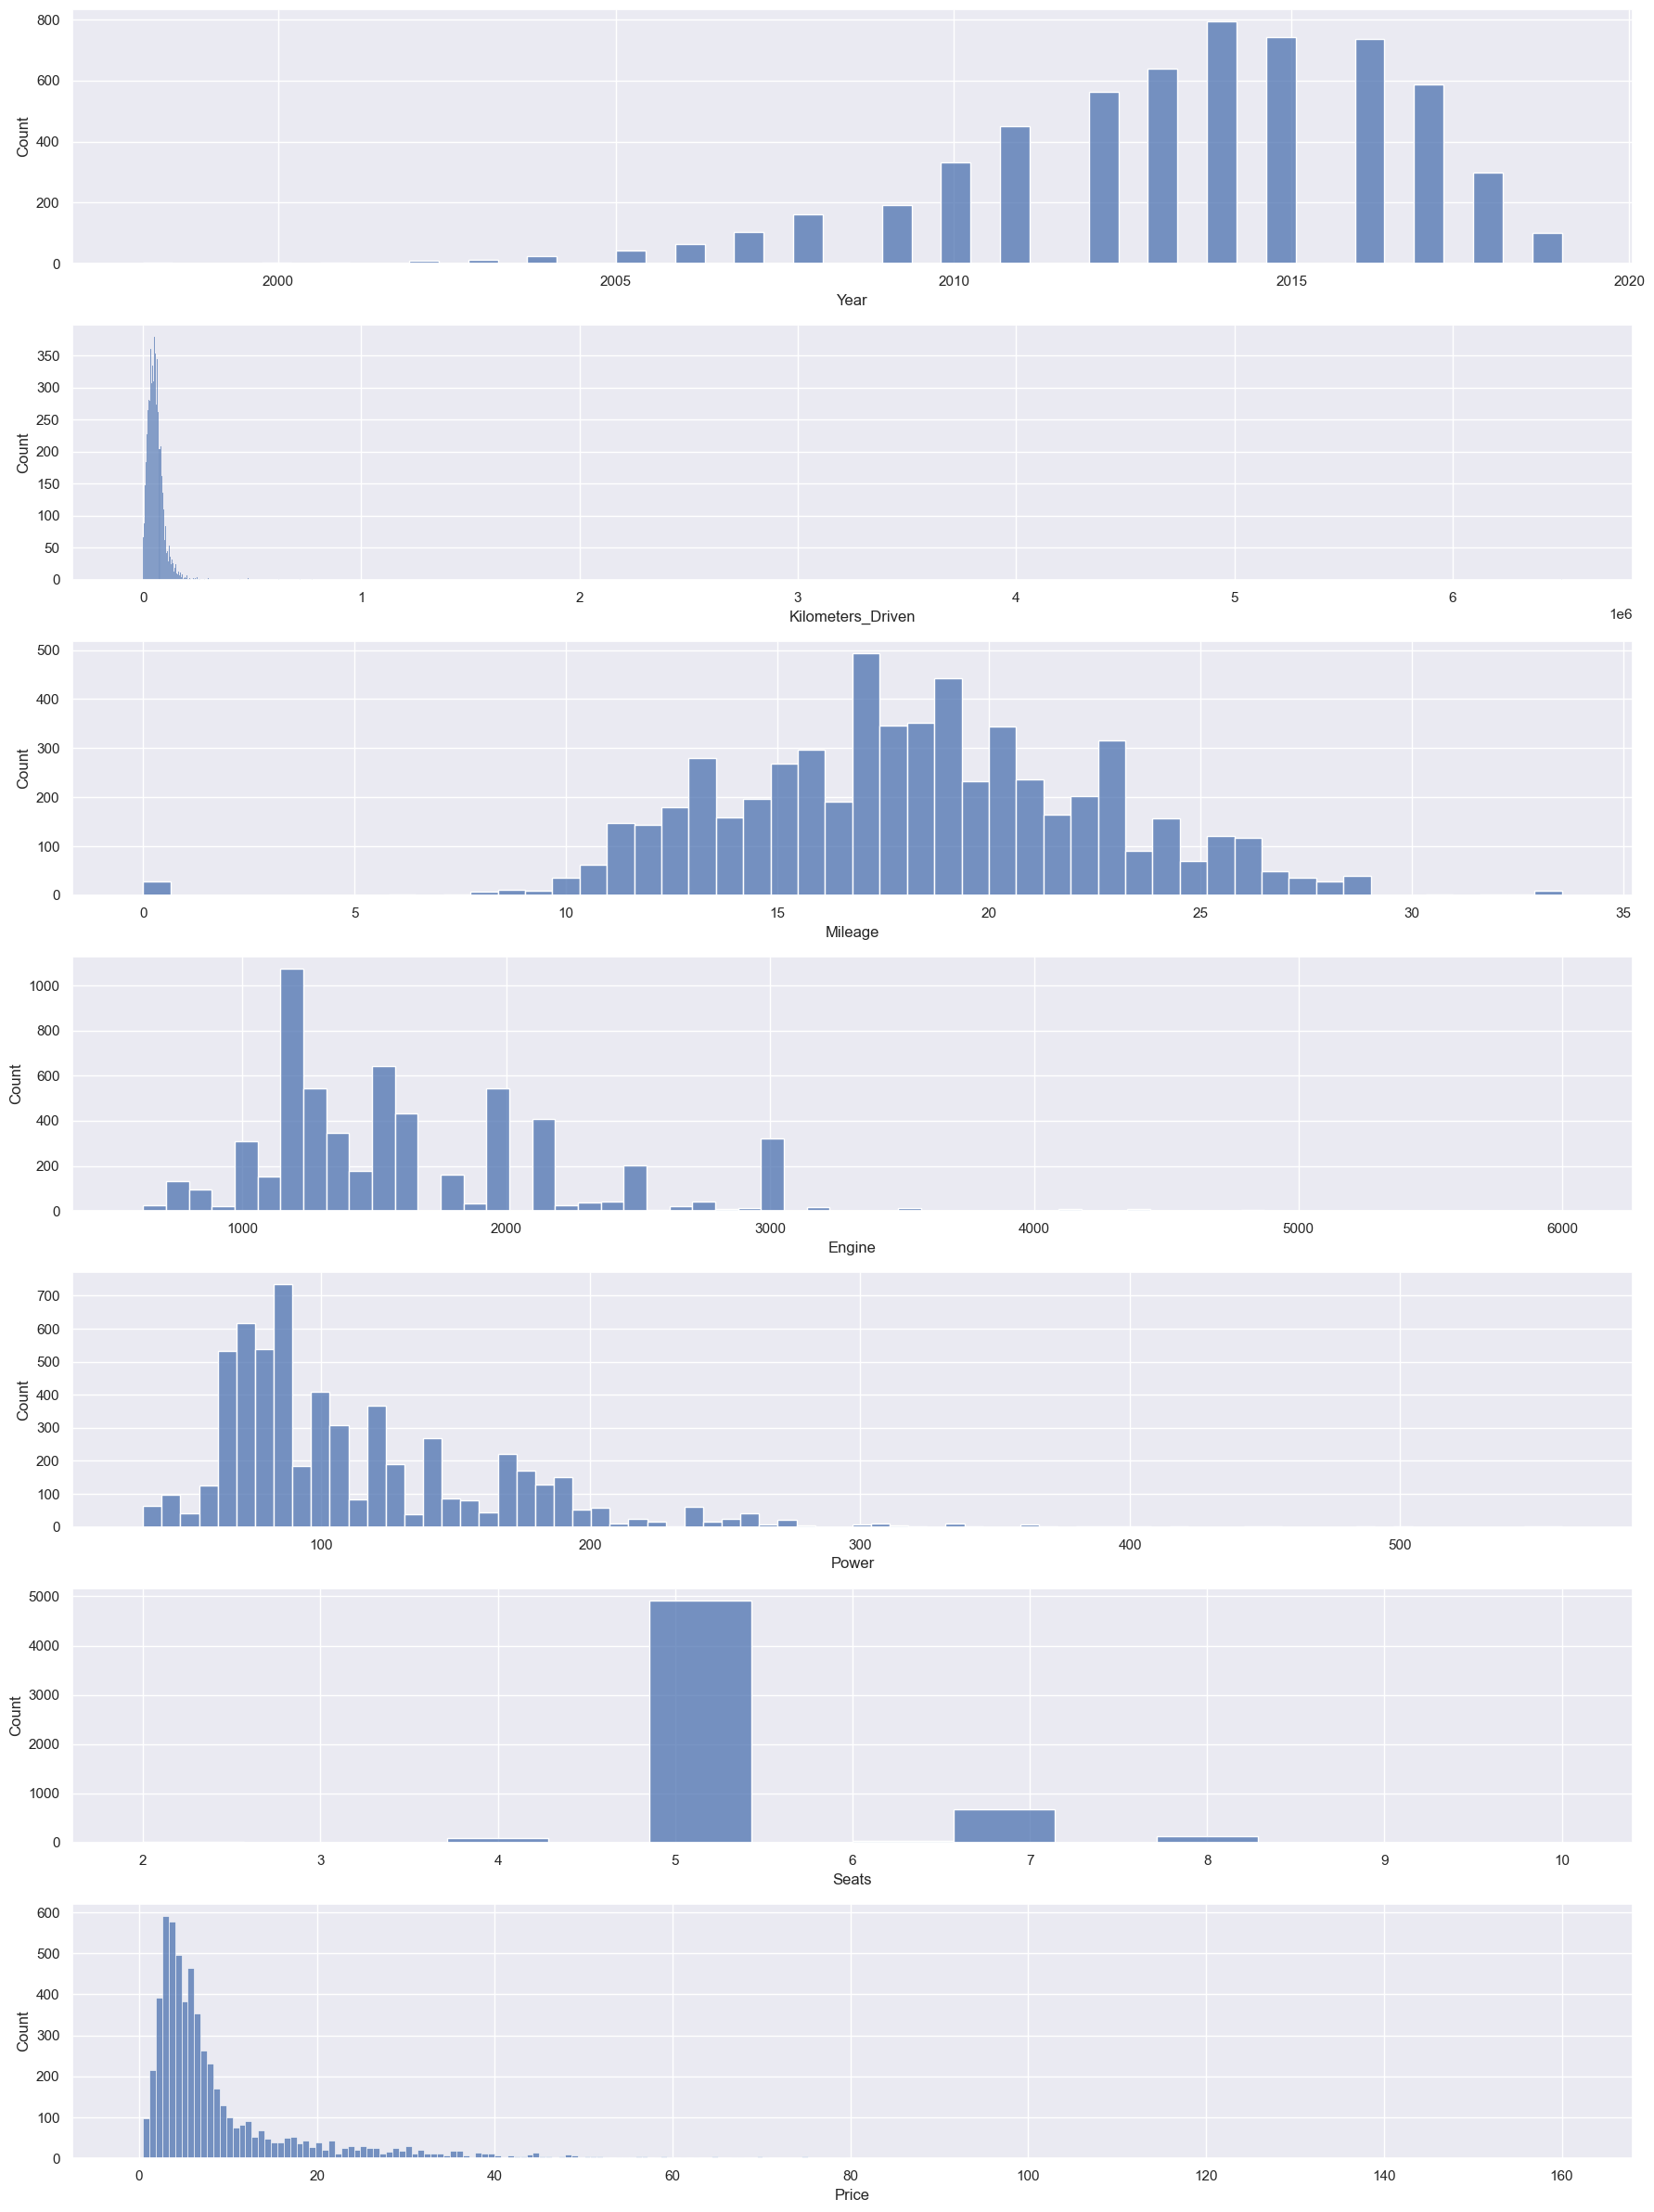

In [38]:
# Draw histogram plots
f, axes = plt.subplots(7, figsize=(18, 24))

for count, var in enumerate(numercialdata):
    sb.histplot(data=numercialdata[var], ax=axes[count])
    axes[count].set_xlabel(var)

# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
numercialdata.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.169396,0.285191,-0.067918,0.014612,0.007960,0.299543
Kilometers_Driven,-0.169396,1.000000,-0.060669,0.093012,0.033470,0.083043,-0.008298
Mileage,0.285191,-0.060669,1.000000,-0.636028,-0.537729,-0.330711,-0.340554
Engine,-0.067918,0.093012,-0.636028,1.000000,0.866303,0.401130,0.658044
Power,0.014612,0.033470,-0.537729,0.866303,1.000000,0.101487,0.772837
Seats,0.007960,0.083043,-0.330711,0.401130,0.101487,1.000000,0.055616
Price,0.299543,-0.008298,-0.340554,0.658044,0.772837,0.055616,1.000000


<Axes: >

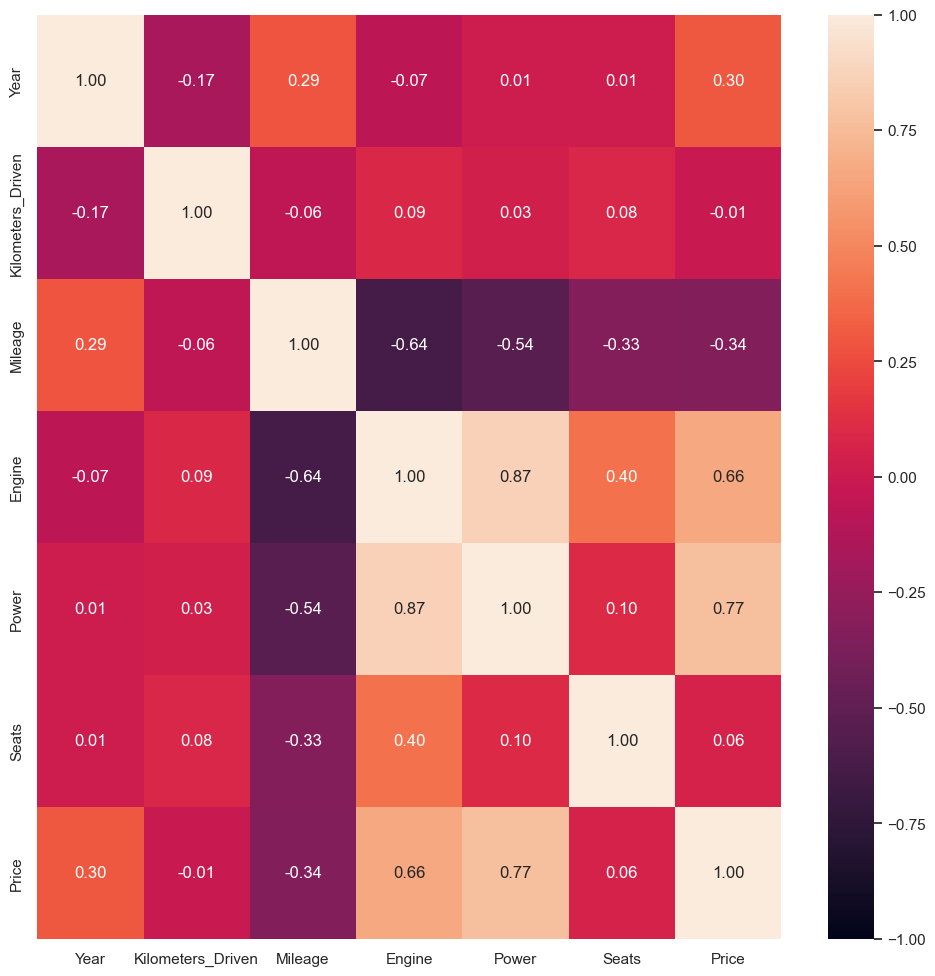

In [46]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sb.heatmap(numercialdata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


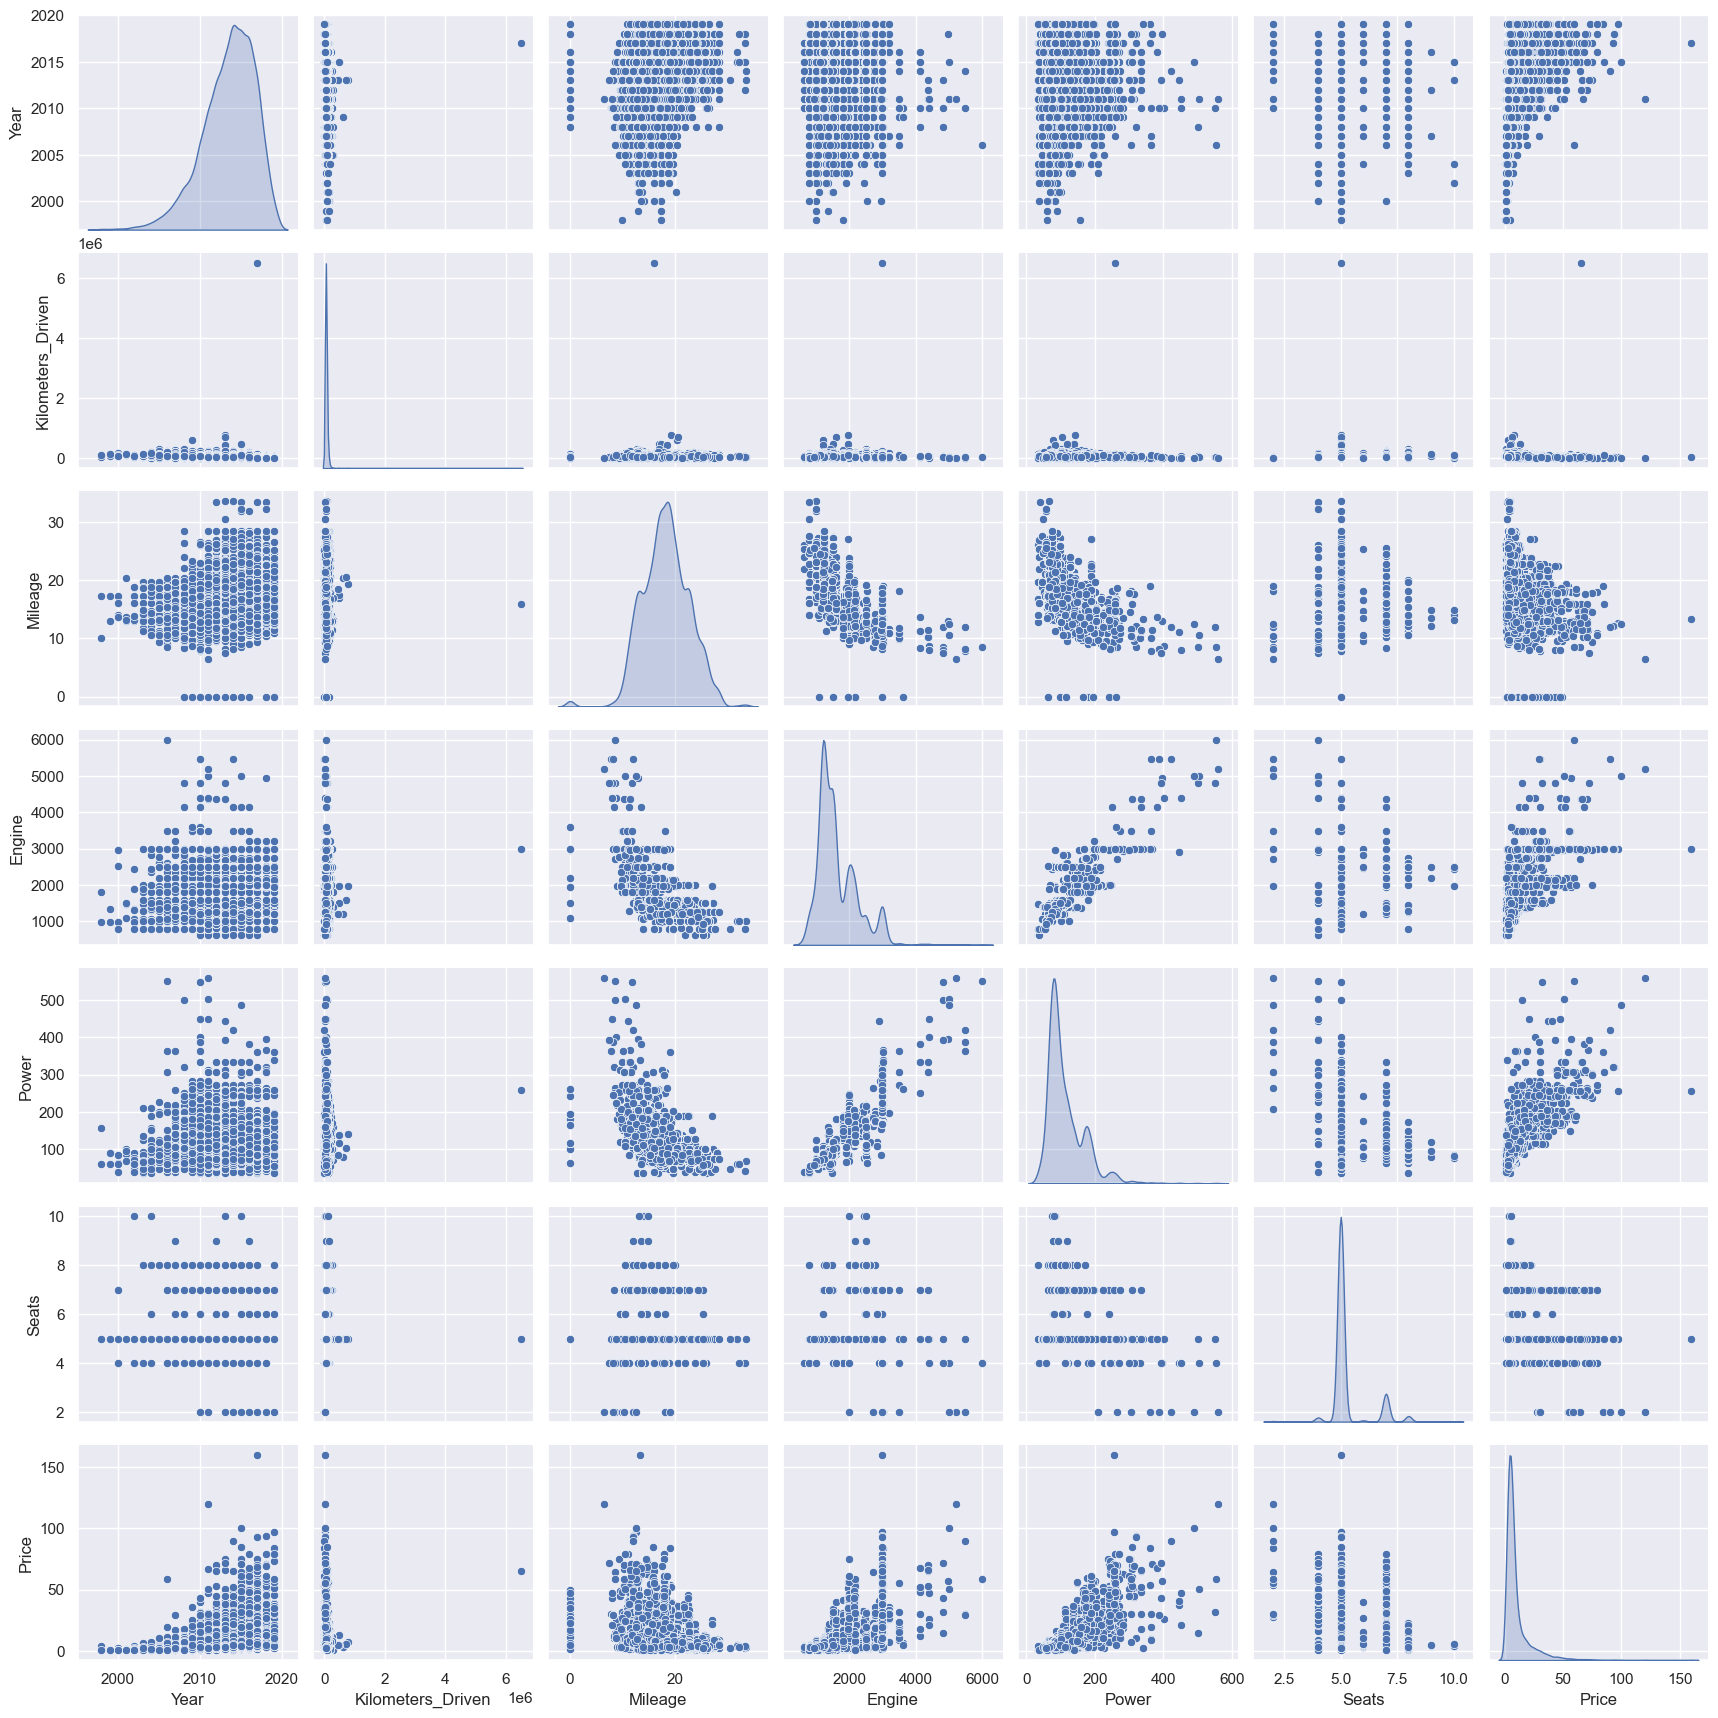

In [47]:
# Draw pairs of variables against one another
sb.pairplot(data=numercialdata, vars=numercialdata.columns, diag_kind='kde')

# Show the plot
plt.show()

# Categorical Data

In [50]:
categoricaldata = cardata[["Fuel_Type","Transmission","Owner_Type","New_Price"]]
categoricaldata.describe()

,Fuel_Type,Transmission,Owner_Type,New_Price
count,5874,5874,5874,823
unique,4,2,4,540
top,Diesel,Manual,First,95.13 Lakh
freq,3153,4172,4840,6


In [51]:
categoricaldata["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3153
Petrol    2656
CNG         55
LPG         10
Name: count, dtype: int64

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


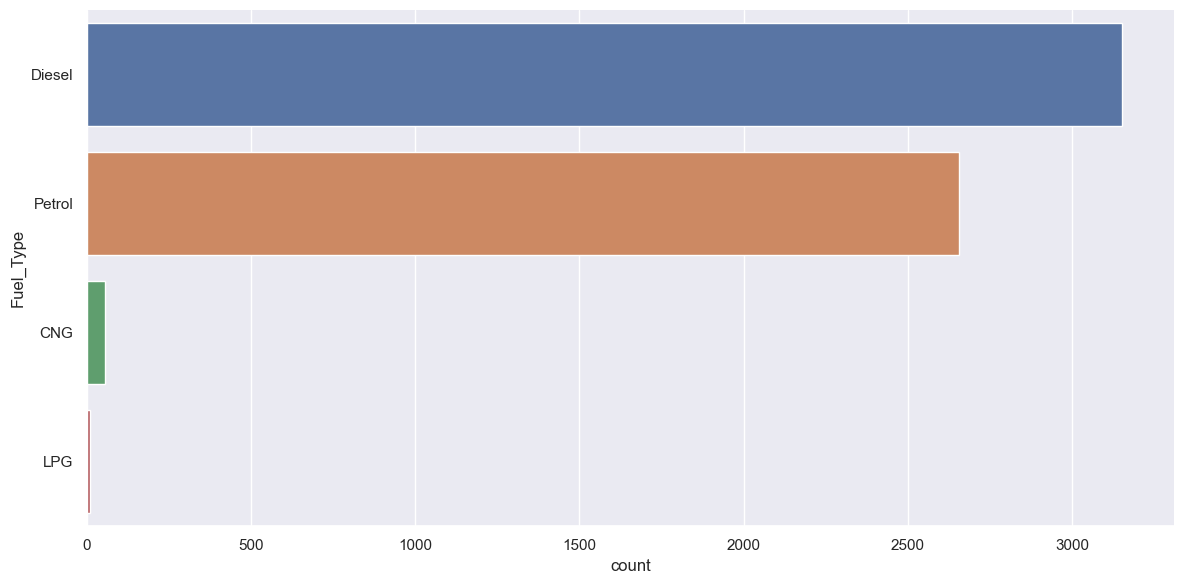

In [60]:
sb.catplot(y = "Fuel_Type", data = categoricaldata, kind = "count", order = ["Diesel","Petrol","CNG","LPG"],height=6, aspect=2)

In [61]:
categoricaldata["Transmission"].value_counts()

Transmission
Manual       4172
Automatic    1702
Name: count, dtype: int64

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


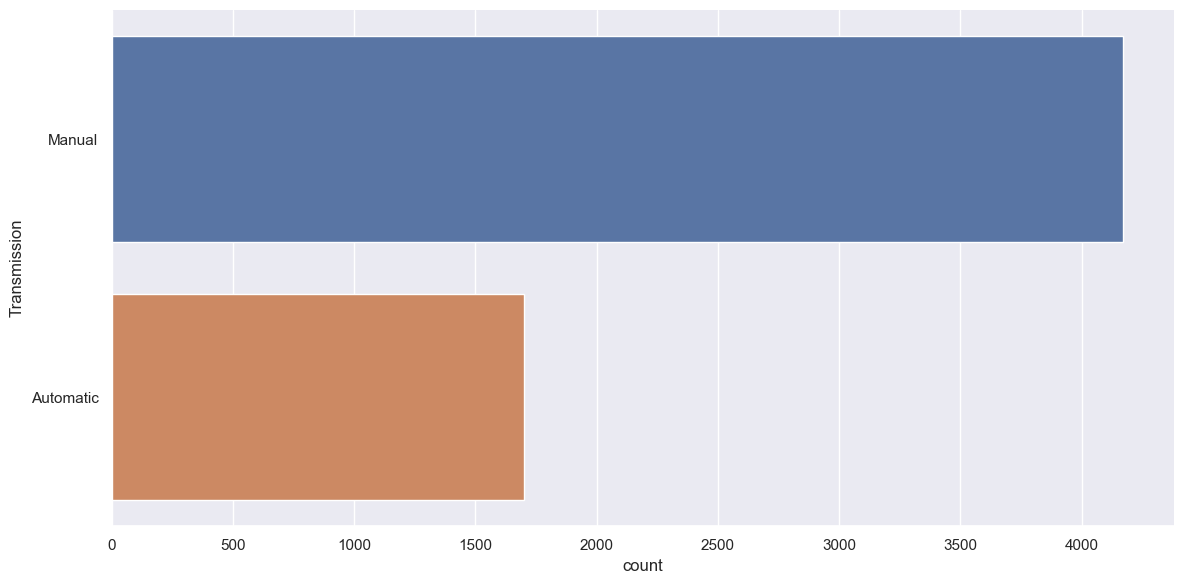

In [62]:
sb.catplot(y = "Transmission", data = categoricaldata, kind = "count", order = ["Manual","Automatic"],height=6, aspect=2)

In [63]:
categoricaldata["Owner_Type"].value_counts()

Owner_Type
First             4840
Second             926
Third              101
Fourth & Above       7
Name: count, dtype: int64

C:\Users\Haoren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


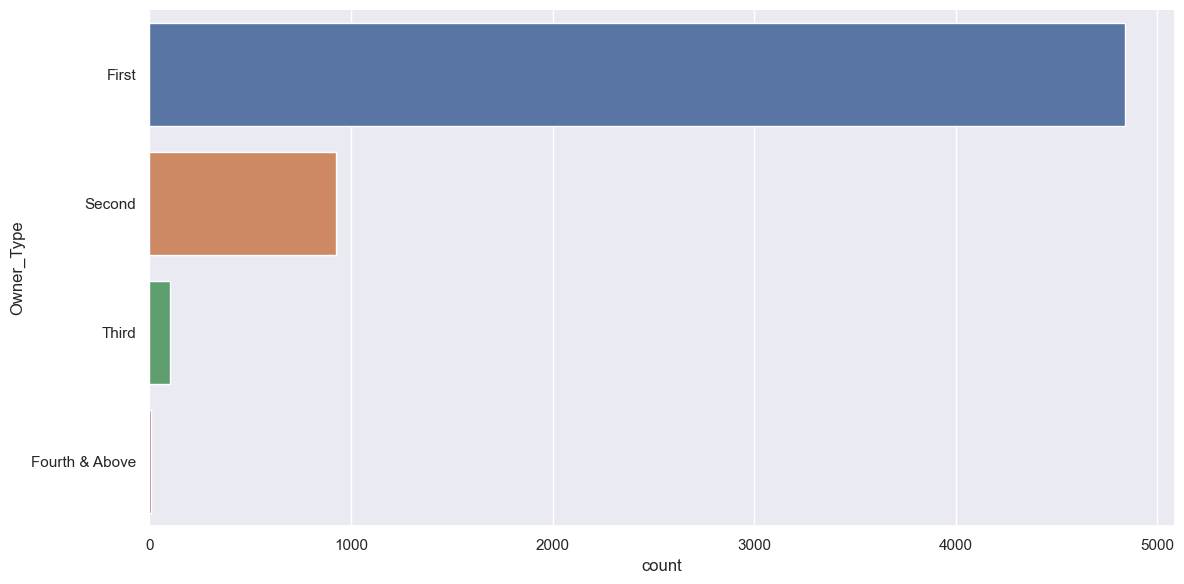

In [64]:
sb.catplot(y = "Owner_Type", data = categoricaldata, kind = "count", order = ["First","Second","Third","Fourth & Above"],height=6, aspect=2)

In [65]:
categoricaldata["New_Price"].value_counts()

New_Price
95.13 Lakh    6
4.78 Lakh     6
63.71 Lakh    6
11.26 Lakh    5
44.28 Lakh    5
             ..
39.6 Lakh     1
1.27 Cr       1
38.11 Lakh    1
8.12 Lakh     1
9.93 Lakh     1
Name: count, Length: 540, dtype: int64